# 학습 목표
* 시계열 데이터의 특성과 정상성 시계열의 개념을 이해하기
* ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용할 수 있습니다.
* 실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인할 수 있습니다.

# 시계열 예측이란(1) 미래를 예측한다는 것은 가능할까?

**시나리오를 생각해보기**
* 지금까지의 주가 변화를 바탕으로 다음 주가 변동 예측
* 특정 지역의 기후 데이터를 바탕으로 내일의 온도 변화 예측
* 공장 센터 데이터 변화 이력을 토대로 이상 발생 예측

위 예시의 공통점은 예측 근거가 되는 시계열(Time-Series) 데이터가 있다는것입니다.    
**시계열이란 순서대로 발생한 데이터의 수열**이라는 뜻입니다.      
    
$Y = \{ Y_t : t \in T \}$, where $T$ is the index set    
    
일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야 하는 것은 아닙니다.    
매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 될것입니다.    
이때 날짜가 인덱을 역할을 하게됩니다. 하지만 여기서 의문점이 생깁니다.    
특정 주식의 오늘까지의 매일 가격 변동 시계열 데이터가 수년 치 쌓여 있다고 히고 우리는 이 데이터를 토대로 예측이 가능할까?    
결론적으로 **미래 예측은 불가능한것**입니다.    
그래도 예측을 하고 싶다면 두가지의 전제가 필요합니다.

* 과거의 데이터에 일정한 패턴이 발견된다.
* 과거의 패턴은 미래에도 동일하게 반복될 것이다.

위 두가지를 전제를 한문장으로 줄인다면 **정상성 데이터에 대해서만 미래 예측이 가능하다** 라고 할 수 있습니다.

## 정상성
* 정상성(Stationary - 안정성)은 시계열 데이터의 통계적 특성이 변하지 않는다.
* 시계열 데이터를 만들어내는 시간의 변화에 무관하게 일정한 프로세스가 존재한다.
* 예를들어 불규칙해 보이는 매일의 날씨 변화에도 연 단위 기후 변화의 일정한 패턴이 유지된다면    
  지구상의 일정한 기후변동 프로세스가 만들어내는 정상성에 의해 내일의 기온은 어느 정도 오차 범위 내에서 예측이 가능할것입니다.

**시계열 데이터 분석은 완벽한 미래 예측을 보장하지는 않지만 어떤 예측하지 못한     
외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 정상성이 훼손될 여지가 있기 때문입니다.**    
**그럼에도 불구하고 시계열 데이터 분석은 프로세스 내재적인 시간적 변화를 묘사하는데 아주 훌륭한 성능을 보입니다.**

# 시계열 예측이란(2) Stationary한 시계열 데이터
**미래의 데이터 예측 조건**
1. 정상성이여야 한다.
2. 시계열 데이터의 통계적 특성이 변하지 않는다.

**통계적 특성이란**
1. 평균
2. 분산
3. 공분산

**위 통계량을 시간 속에서 의미있으려면 아래의 통계치가 일정해야한다.**
1. 이동평균
2. 이동표준편차
3. 자기공분산

#### **결론** : 시계열이란 순서대로 발생한 데이터의 수열이며 예측을 하기 위해서는 통계적 특성 (평균, 분산, 공분산)이 변하지 않아야 합니다. 
#### 또한 통계량이 의미가 있으려면 이동평균, 이동표준편차, 자기공분산의 통계치가 일정해야합니다.

# 시계열 예측이란(3) 시계열 데이터 사례분석

## 시계열(Time Series) 생성
* 첫 번째로 다루어볼 데이터는 Daily Minimum Temperatures in Melbourne입니다. 온도 변화를 다루는 시계열인 만큼 안정성(정상성)이 있지 않을까요?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [10]:
df = pd.read_csv('daily-min-temperatures.csv') 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


오늘 다루게 될 시계열이란 것도 결국 시간 컬럼은 index로 하는 Series로 표현됩니다.    
우리가 읽어 들인 데이터 파일은 Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환되었습니다.    
**이것은 아직 시계열의 데이터 구조는 아닙니다**
위의 DataFrame에서 Data 컬럼을 index로 삼아 시계열을 생성해 봅시다.

In [5]:
import pandas as pd

raw_url = "https://raw.githubusercontent.com/upul/WhiteBoard/master/data/daily-minimum-temperatures-in-me.csv"

# CSV 읽기
df = pd.read_csv(
    raw_url,
    quotechar='"',
    on_bad_lines='skip',
    parse_dates=['Date'],
    index_col='Date'
)
df.rename(columns={
    'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'Temp'
}, inplace=True)

df.head()
# print(df.columns)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


* 시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나옵니다. 우리가 찾는 시계열은 바로 여기 있습니다.

In [8]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: object

DataFrame인 df와 Series인 df['Temp']는 index 구조가 동일하므로 Numpy, Pandas, Matplotlib 등      
많은 라이브러리들이 호환해서 지원해 줍니다. 하지만 그렇지 않은 경우도 간혹 발생하므로      
여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.    

In [9]:
## 왜인지 github에서 들고온 데이터는 ?0.2와 같은 오류 값이 있음 그부분을 처리해줘야함

ts1 = pd.to_numeric(ts1, errors='coerce')  # 오류 값은 NaN 처리
print(ts1.dtypes)  # float64일 것

# NaN 있는지 확인
print("결측치 개수:", ts1.isna().sum())

ts1 = ts1.dropna()

float64
결측치 개수: 3


## 시계열 안정성(정상성)의 정성적 분석

이제 시계열이 준비되었으므로 시각화를 통해 안정성(Stationarity) 여부를 확인해 보겠습니다.

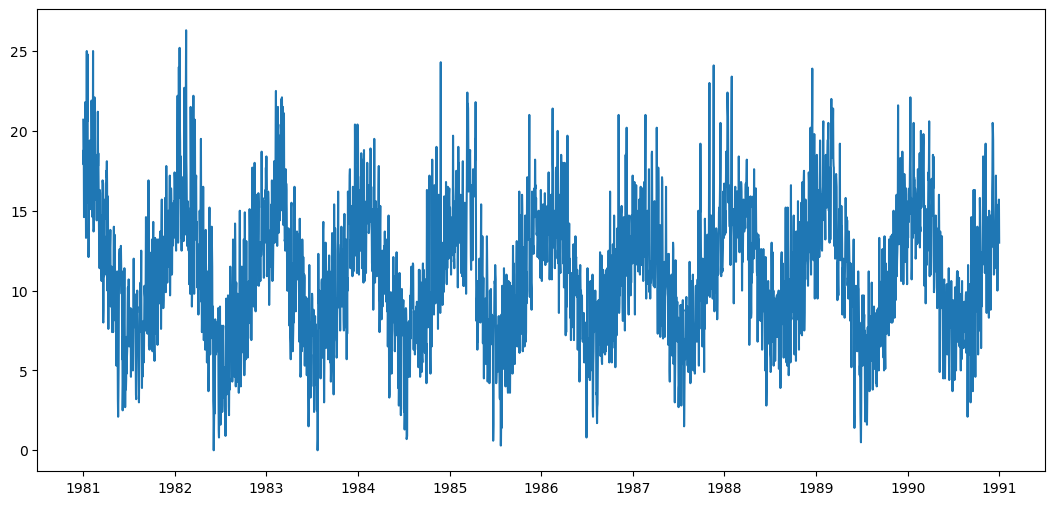

In [11]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)
plt.show()

분석하기전 결측치 유무 확인하기

In [12]:
# 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.
ts1[ts1.isna()]  

Series([], Name: Temp, dtype: float64)

결측치의 데이터는 없습니다.    
만일 결측치가 있는 경우는 조치를 해야하며 NaN이 들어있는 데이터는 통계 분석시 많은 오류와 분석 결과에도 악영향을 미칩니다.    
**결측치가 있는경우**
1. 결측치가 있는 데이터를 모두 삭제한다.(drop)
2. 결측치 양옆의 값들을 이용해서 적정히 보간(interpolate)하여 대입한다.

이번 경우는 시간을 index로 가지는 시계열 데이터로 삭제하는 것보다 보간하는 방법을 선택하겠습니다.    
pandas에서 결측치 보간을 처리하는 메서드는 공식문서를 참고하세요.
* 공식문서 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

#### 추가 학습 (보외법)    
주어진 데이터 집합의 범위를 넘어서는 영역에서 값을 추정하기 위해 사용되는 통계기법이고,     
주어진 데이터의 패턴과 경향성을 파악해서 결측치를 처리합니다.

pandas에서 결측치 보간을 처리하기

Series([], Name: Temp, dtype: float64)


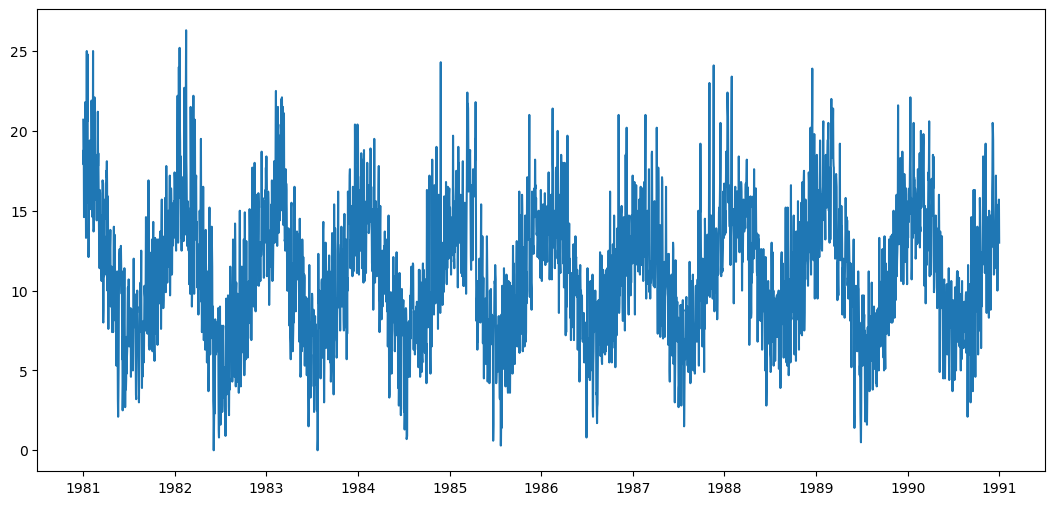

In [13]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)
plt.show()

**시계열 데이터의 통계적 특성을 좀 더 명로하게 시각화해보기**
* 아래는 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다.
* 현재 타임 스텝 부터 window에 주어진 타임 스텝 이전 사이
  1. 구간의 평균(rolling mean, 이동평균)과
  2. 구간의 표준편차(rolling std, 이동표준편차)를


**원본 시계열과 함께 시각화해보면 좀 더 뚜렷한 경향성을 확인할 수 있습니다.**
> 아래 코드에서 window는 다음 정의에서 특정 개수(d)에 해당합니다.
> * 이동평균(Moving Average. 혹은 Rolling Mean)    
>   이동평균이란 시계열 데이터에서 특정 개수(d)의 데이터를 시점(t)을 이동하며 계산하는 평균입니다.    
>   $E(X_t + X_{t+1} + X_{t+2} + \dots + X_{t+d-1})$    
>    
> * 이동표준편차(Rolling std)    
>   이동표준편차란 시계열 데이터에서 특정 개수(d)의 데이터를 시점(t)을 이동하며 계산하는 표준편차입니다.    
>   (표준편차는 분산에 제곱근을 씌운 값입니다.$\sigma(X) = \mathrm{VAR}(X)$)    
>   $\sigma(X_t + X_{t+1} + X_{t+2} + \dots + X_{t+d-1})$    

In [14]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


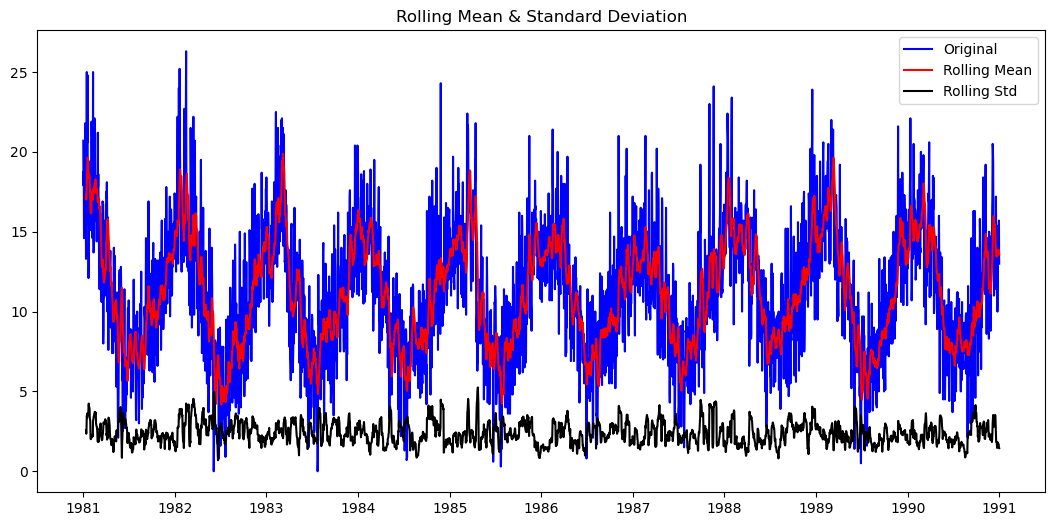

In [15]:
# 윈도우 특정갯수 12
plot_rolling_statistics(ts1, window=12)

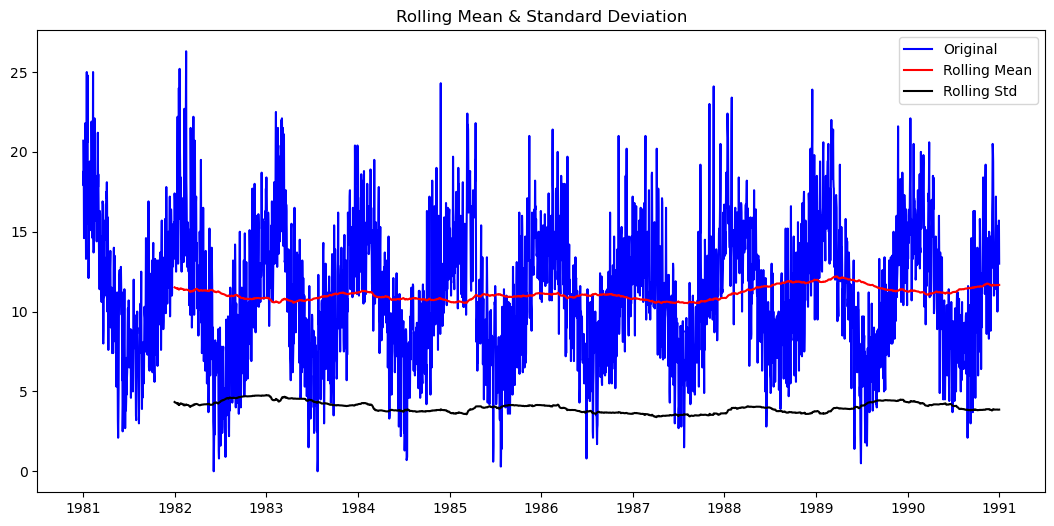

In [16]:
# 윈도우 특정갯수 365
plot_rolling_statistics(ts1, window=365)

위 데이터가 정상성이라고 명확하게 결론을 내릴수 있을까?    
시각화한 결과만 놓고보면 그렇다고 말할 수 있겠지만 명확하게 단정지으려면 좀 더 통계적인 접근이 필요합니다.    
다음 스텝에서 다루기로하고 이번에는 다른 시계열 데이터의 패턴과 비교해보겠습니다.

## 다른 데이터에 대해서도 비교해 보자.
이번에는 International airline passengers 데이터셋입니다.     
월별 항공 승객 수(천명 단위)의 시계열 데이터인데 기온 변화 데이터셋과는 좀 다른 패턴이 나타나지 않을까요?    
위와 동일한 방법으로 분석해 보겠습니다.

In [17]:
# 깃에서 데이터 가져오기.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, index_col='Month', parse_dates=True).fillna(0)
print(type(df))
df.head()


<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


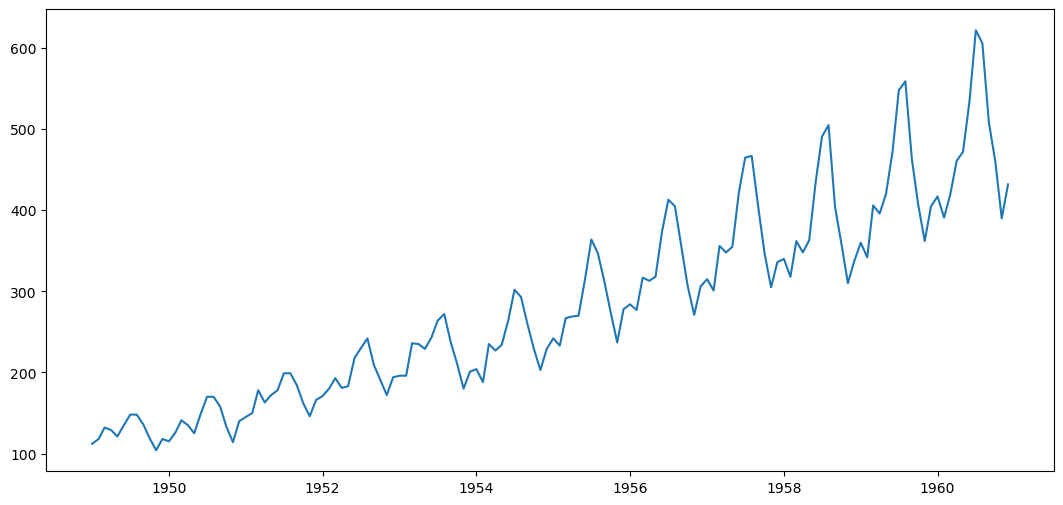

In [18]:
# 가져온 데이터 시각화로 확인하기
ts2 = df['Passengers']
plt.plot(ts2)
plt.show()

온도변화 데이터셋과는 다른 패턴이 보이며, 시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴이 확인됩니다.

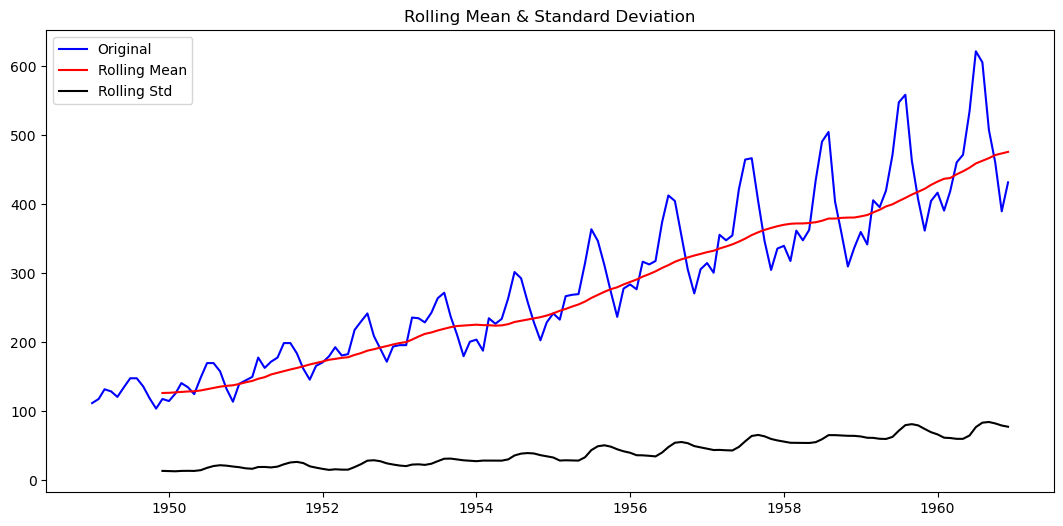

In [19]:
# rolling statistics를 추가해서 시각화하기
# 윈도우 특정갯수 12
plot_rolling_statistics(ts2, window=12)

위와 같이 추이에 따라 평균과 분산이 증가하는 패턴을 보이면 이 시계열 데이터는 적어도 정상성이지 않다고 정성적인 결론을 내려볼 수 있을것 같습니다.    
이런 시계열 데이터에 대해서는 시계열 예측을 시도할 수 없는건지 알아보도록 하겠습니다.    
이후 스텝에서는 **불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석** 을 다루어 볼 것입니다.    

 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 보았습니다.    
 이것은 시계열 데이터를 다루는 가장 기본적인 접근법이라 할 수 있습니다.    
 하지만 시계열 데이터의 안정성을 평가하는 데는 보다 정량적인 방법이 있습니다.

# 시계열 예측이란(4) Stationary 여부를 체크하는 통계적 방법

## Augmented Dickey-Fuller Test
이번 스텝에서는 Augmented Dickey-Fuller Test(ADF Test) 라는 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법을 소개하려고 합니다.  
    
**테스트 내용**
1. 주어진 시계열 데이터가 안정적이지 않다 라는 귀무가설(Null Hypothesis)를 세운다.
2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우
3. 이 시계열 데이터가 안정적이다 라는 대립가설(Alternative Hypothesis)를 채택한다.

* 귀무가설, 대립가설, p-value : https://www.notion.so/p-value-200b70d8d96a80258f71e0046d922f67
* ADF 검정 더 알아보기 : https://www.notion.so/ADF-200b70d8d96a8032b76cf6a4335afd59

**문제1 p-value(유의확률)이란 어떤 의미인가요?**    
귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 실제로 관측 될 확률이다.    
p-value의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률로서,    
귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다.     
이 값이 0.05 미만으로 매우 낮게 나온다면 p-value만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다.

## statsmodels 패키지와 adfuller 메서드    
statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지    
* 아래는 statsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드

In [20]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


이전 스텝에서 정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [21]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444653
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3626.000000
Critical Value (1%)              -3.432155
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


ts1(Daily Minimum Temperatures in Melbourne)시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다.    
따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [22]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


ts2(International airline passengers) 시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.    
p-value가 1에 가깝다는 것이 이 귀무가설(주어진 시계열 데이터가 안정적이지 않다.) 이 옳다는 직접적인 증거는 아닙니다.    
하지만 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

# 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?
위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 조금 더 분석해 보겠습니다.    
안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다.    
1. 정성적인 분석을 통해 보다 정상성(stationary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도
2. 시계열 분해(Time series decomposition) 기법을 적용

## 1. 보다 Stationary한 시계열로 가공해 가기

### 1-1. 로그함수변환
먼저 고려해볼 수 있는것은 시간 추이에 따라 분산이 점점 커지고 있다는 점이다.    
시계열이 이런 특성을 보일 경우에는 로그 함수로 변환을 해주는것이 도움이 된다.

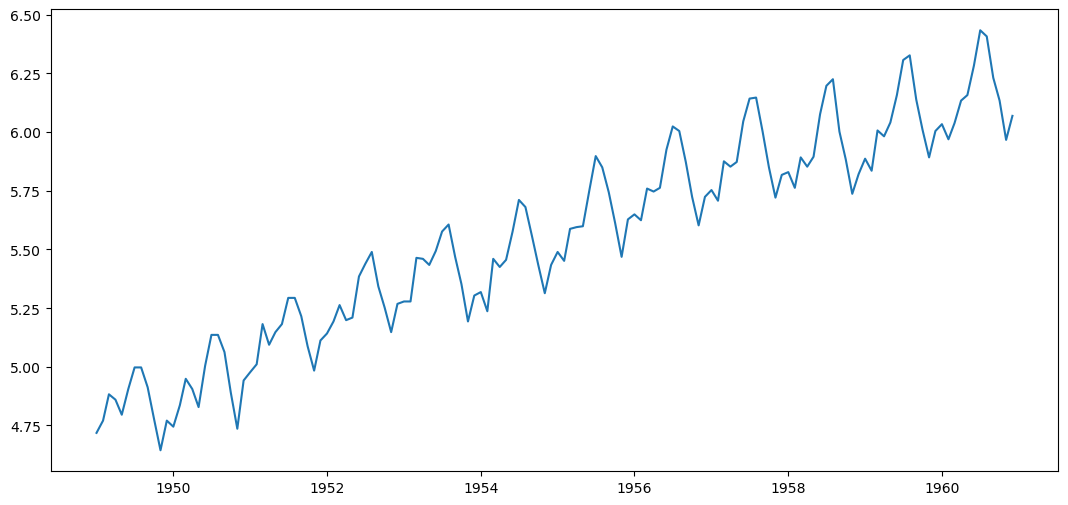

In [24]:
# 로그 변환 후 시각화하기
ts_log = np.log(ts2)
plt.plot(ts_log)
plt.show()

로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [25]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


* p-value가 0.42로 무려 절반 이상 줄어들었습니다.
* 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다.
* 현재 두드러지는 문제점은 시간 추이에 따라 평균이 증가한다는 점으로 아직은 부족합니다.

### 1-2. Moving average 제거 - 추세(Trend) 상쇄하기
시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 추세(trend)라고 합니다.    
이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼주도록 하겠습니다.

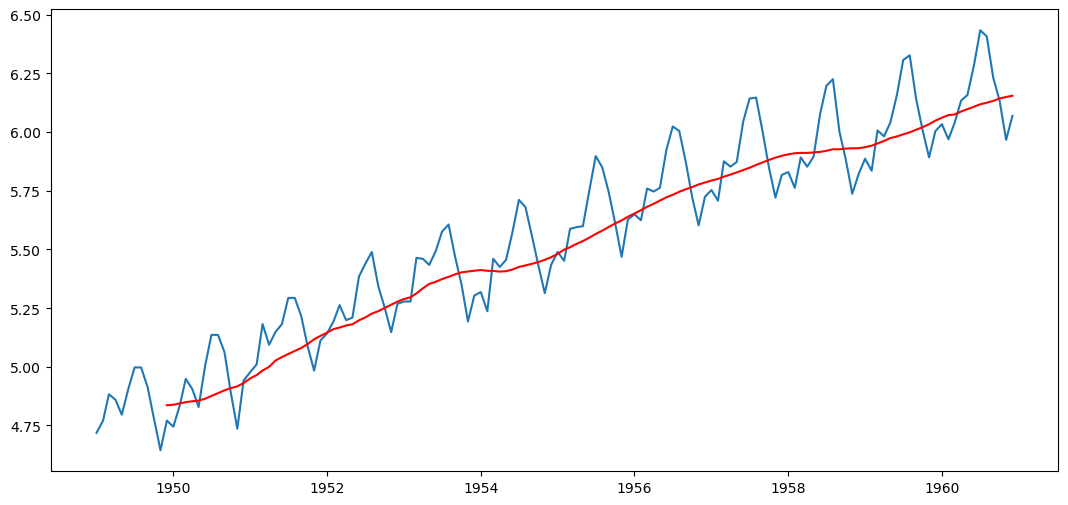

In [26]:
# moving average구하기 
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [27]:
# 변화량 제거 (rolling mean을 ts_log에서 빼기)
ts_log_moving_avg = ts_log - moving_avg 
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

 ts_log_moving_avg에 거의 도달했지만 Moving Average 계산시(windows size = 12 인경우) 앞의 11개의 데이터는    
 Monving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점.    
 이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다.

In [28]:
# 결측치 제거하기
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 봅시다.

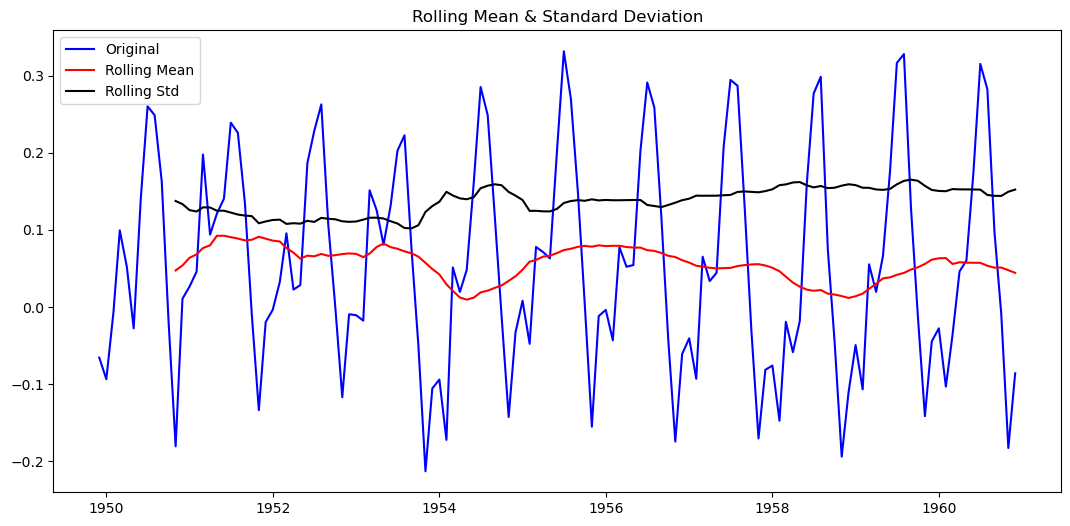

In [29]:
#시각화
plot_rolling_statistics(ts_log_moving_avg)

In [30]:
# 데이터 확인하기
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.    
    
그러나 지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.    
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점입니다.     
    
만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

In [31]:
# window=6 적용해보기
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


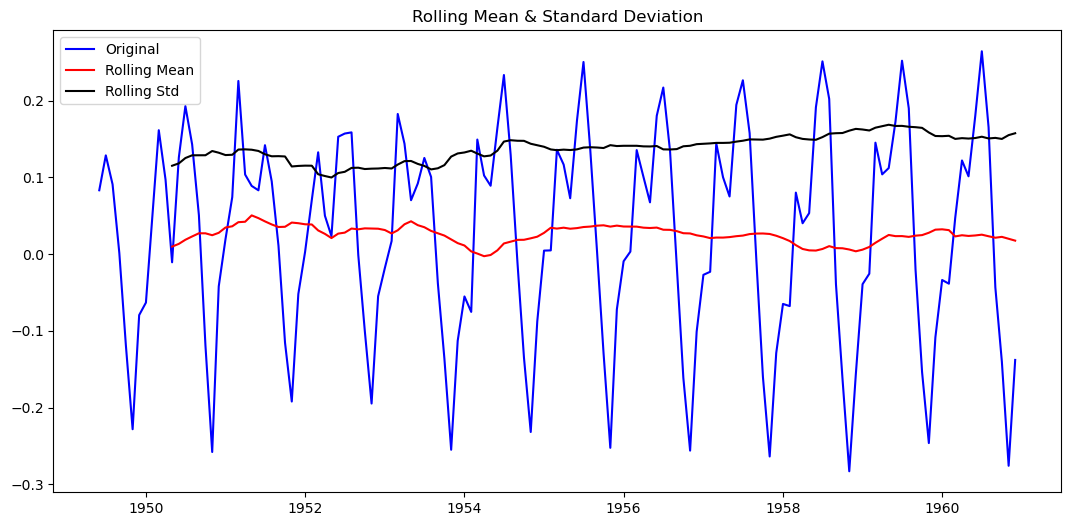

In [32]:
# window=6 시각화
plot_rolling_statistics(ts_log_moving_avg_6)

In [33]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만     
Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.    

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만,    
moving average를 고려할 때는 rolling mean을 구하기 위한 **window 크기를 결정하는 것이 매우 중요**하다는 것을 기억해 둡시다.    
    
이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

### 1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소입니다.     
이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.    
> **추세 (Trend)**    
장기적으로 증가하거나, 감소하는 경향성이 존재하는 것을 의미합니다.    
주로 시계열에서 기울기가 증가하거나 감소할 때 관찰됩니다.    
일정 시간 발생했다가 사라지고 반복되지 않습니다.    

>**계절성 (Seasonality)**    
계절적 요인의 영향을 받아 1년, 혹은 일정 기간 안에 반복적으로 나타나는 패턴을 의미합니다.    
빈도의 형태로 나타나며 항상 일정한 경우가 많습니다.    

>**주기성 (Cycle)**    
정해지지 않은 빈도, 기간으로 일어나는 상승 혹은 하락을 의미합니다.    
>(주기성은 학자마다 조금씩 정의가 다르니, 참고로만 알아 두시길 바랍니다)    

위 같은 패턴을 상쇄하기 위해 효과적인 방법은 차분(Differencing)이 있습니다.    
마치 미분(Differentiation)을 떠올리게 하는 개념인데요, 시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법입니다.    
이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 **이번 스텝에서 발생한 변화량**을 의미하게 됩니다.

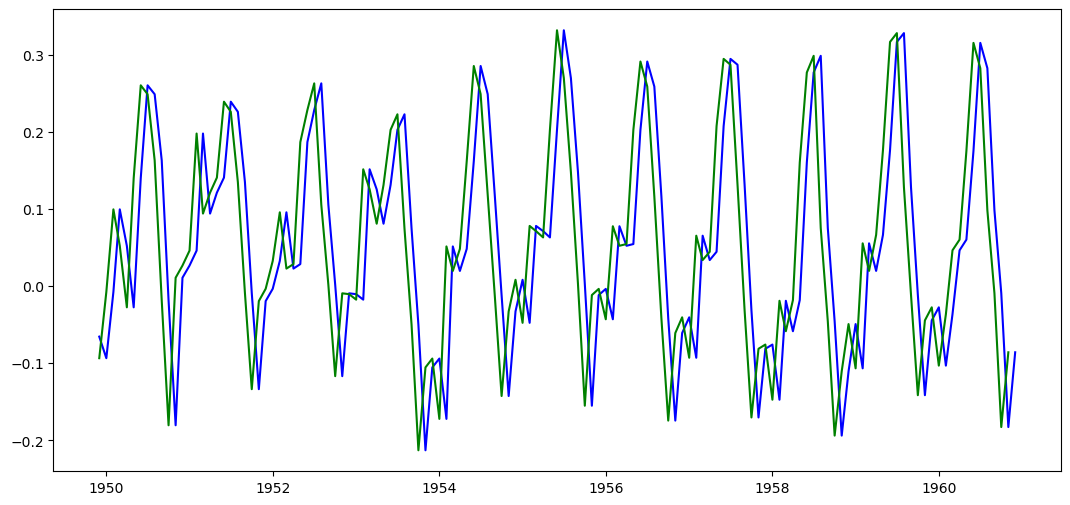

In [34]:
# 시프트한 시계열과 원본 시계열에 대한 그래프를 그려봅시다.
ts_log_moving_avg_shift = ts_log_moving_avg.shift(-1)

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

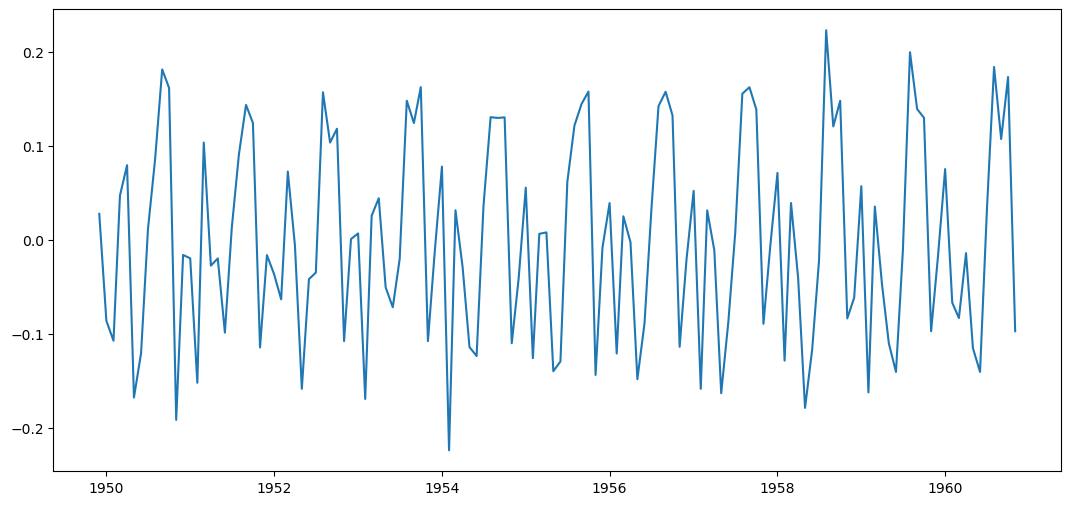

In [35]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현해 봅시다.
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

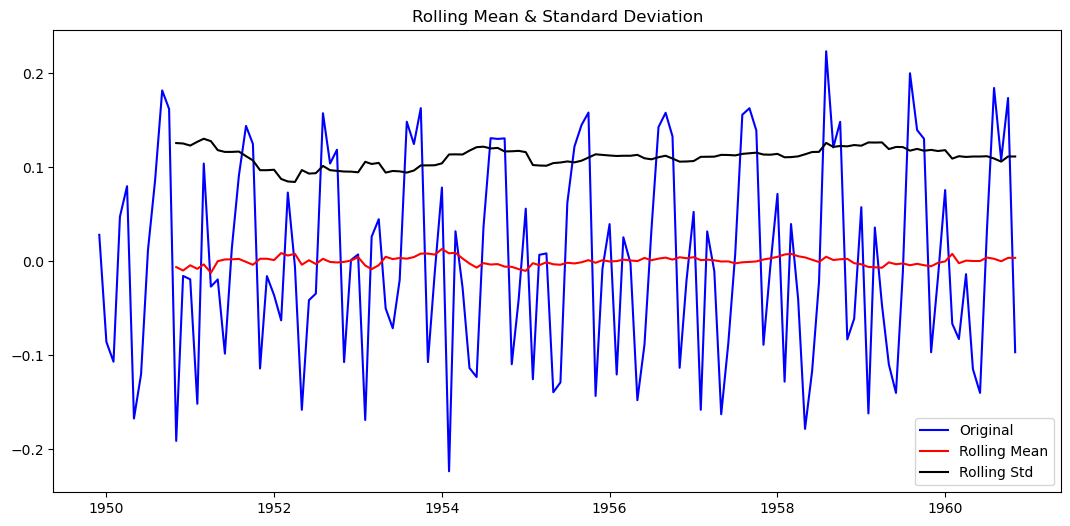

In [36]:
# 이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해 봅시다.
plot_rolling_statistics(ts_log_moving_avg_diff)

In [37]:
# 차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여     
Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.    
    
데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분),     
3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

## 2. 시계열 분해(Time series decomposition)
statsmodels 라이브러리 안에는 seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를     
직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거,    
differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다.    
    
이번에는 위에서 구했던 로그 변환 단계(ts_log)에서부터 출발해 봅시다.

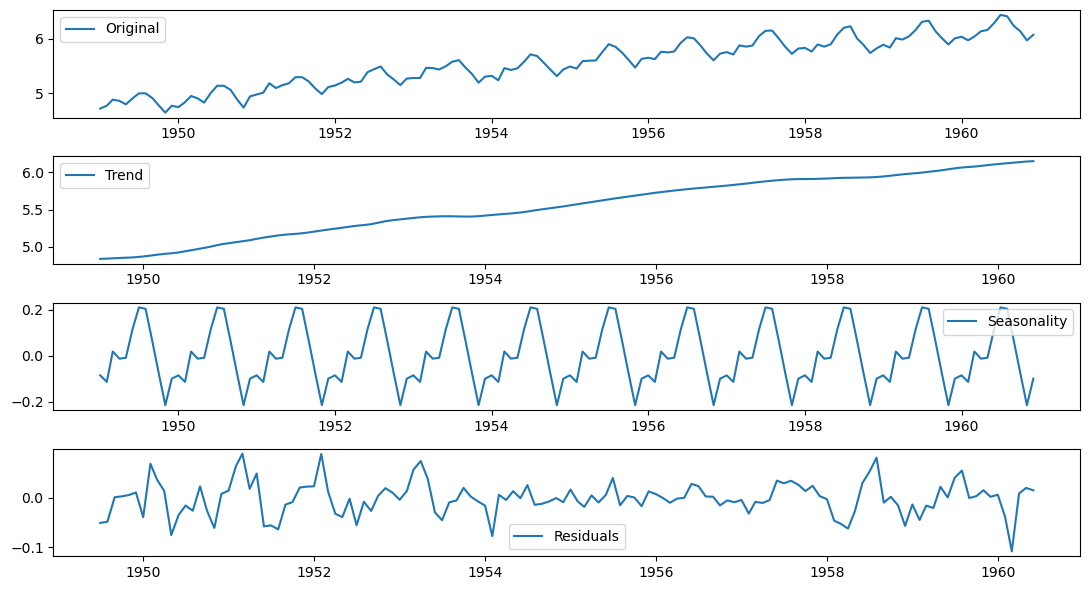

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* Original 시계열에서 **Trend와 Seasonality를 제거하고 난 나머지를 Residual**이라고 합니다. 
* 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 
* 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.

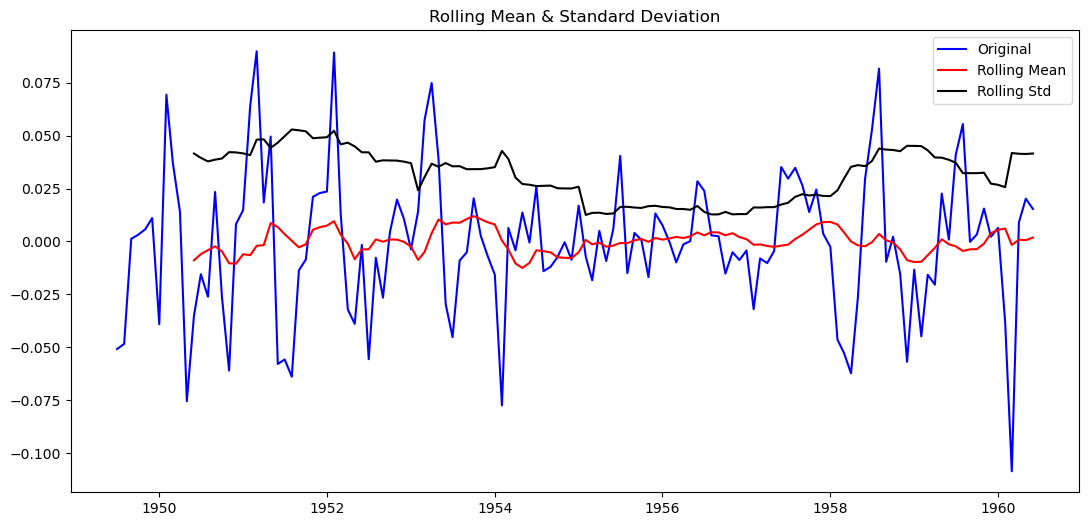

In [40]:
# Residual에 대해 안정성 여부를 따져 보기
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [41]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다.    
이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다.     
어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요?     
물론 그렇긴 합니다만, 이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를     
단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

# ARIMA 모델의 개념

## 1. ARIMA 모델의 정의
앞에서 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인했습니다    
또, Trend와 Seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였습니다.    
    
ARIMA(Autoregressive Integrated Moving Average)를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있습니다.    
    
ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average) 라고 할 수 있는데,     
각각의 개념을 살펴보면 지금까지 배운 개념과 닮아 있음을 알게 됩니다.        
     
시계열 데이터 $Y = \{ Y_t : t \in T \}$를 생각해 봅시다.  
$Y_t$를 예측하기 위해서 다음과 같은 모델들을 생각해 볼 수 있습니다.


### 1-1. AR(자기회귀, Autoregressive)
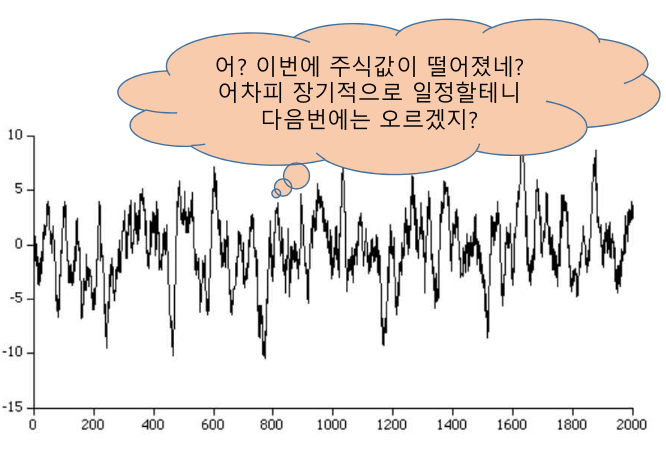

* 과거 값들에 대한 회귀로 미래 값을 예측하는 방법
* $Y_t$가 이전 $p$개의 데이터 $Y_{t-1}, Y_{t-2}, \dots, Y_{t-p}$의 가중합으로 수렴한다고 보는 모델
* $Y_t = \phi_0 + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t$
    * AR은 시계열의 Residual에 해당하는 부분을 모델링한다고 볼 수 있습니다.
    * 가중치의 크기가 1보다 작은 $Y_{t-1}, Y_{t-2}, \dots, Y_{t-p}$의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.
    * 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있습니다.

### 1-2. MA(이동평균, Moving Average)
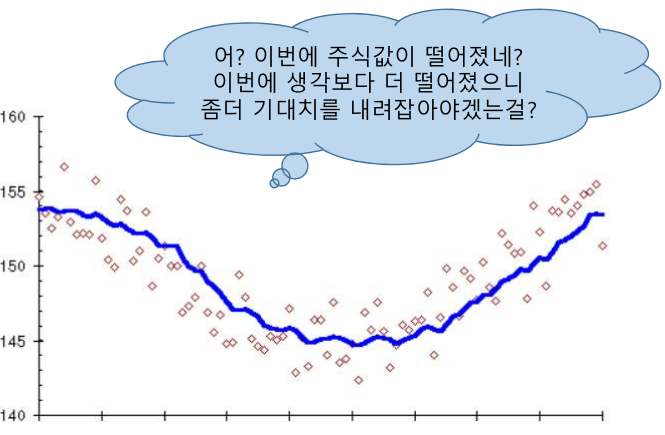
MA는 $Y_t$가 이전 $q$개의 예측오차값 $e_{t-1}, e_{t-2}, ..., e_{t-q}$의 가중합으로 수렴한다고 보는 모델입니다.       
$Y_t = \mu + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q}$    

* MA는 시계열의 Trend에 해당하는 부분을 모델링한다고 볼 수 있습니다.  
* 예측오차값 $e_{t-1}$이 0보다 크면 모델 예측보다 관측값이 더 높다는 뜻이므로, 다음 $Y_t$ 예측 시에는 예측치를 올려잡게 됩니다.  
* 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점이라고 볼 수 있습니다.


### 1-3. I(차분 누적, Integration)

I는 $Y_t$이 이전 데이터와 $d$차 차분의 누적(integration) 합이라고 보는 모델입니다.      
I는 시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있습니다.      
    
예를 들어 $d=1$이라면 $Y_t$는 $Y_{t-1}$과 $\Delta Y_{t-1}$의 합으로 보는 것입니다.    
    
ARIMA는 위 3가지 모델을 모두 한꺼번에 고려합니다.      
주식값을 예측하는 우리의 태도와 비슷하지 않나요?    
    
위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때,      

* '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와  
* '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가      
    
동시에 떠오르게 됩니다.    
    
ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여 줍니다.    

## 2. ARIMA 모델의 모수 p, q, d

ARIMA를 효과적으로 활용하기 위해서는 ARIMA의 모수(parameter)를 잘 설정해야 합니다.     
핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있다는 것이지요.    
    
ARIMA의 모수는 아래의 3가지가 있습니다
* p : 자기회귀 모형(AR)의 시차
* d : 차분 누적(I) 횟수
* q : 이동평균 모형(MA)의 시차

이들 중 p 와 q 는 일반적으로 p + q < 2, p * q = 0 인 값을 사용하는데, 이는 p 나 q 중 하나는 0이라는 뜻입니다.     
이렇게 하는 이유는 많은 시계열 데이터가 AR이나 MA 중 하나의 경향만 가지기 때문입니다.    
   
그러면 모수 p, q, d는 어떻게 결정될까요? 여기서부터의 설명이 매우 어렵습니다.     
    
ARIMA의 적절한 모수 p, d, q를 선택하는 방법으로 많은 통계학적인 시도들이 있지만 대표적인 것만 이야기하면      
ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)를 말할 수 있습니다.     
이 AutoCorrelation은 우리가 맨 첫 스텝에서 다룬 개념 중 하나인 자기상관계수와 같은 것입니다.

**ACF**
     
시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수      
주어진 시계열의 현재 값이 과거($y_{t-1}, y_{t-2}, ..., y_{t-n}$) 값과 어떻게 상관되는지 설명함.      
ACF plot에서 X축은 상관 계수를 나타내며, Y축은 시차 수를 나타냄    
    
**PACF**    
    
다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수      
$k$ 이외의 모든 시차를 갖는 관측치($y_{t-1}, y_{t-2}, ..., y_{t-k+1}$)의 영향력을 배제한 가운데, 특정 두 관측치,      
$y_t$와 $y_{t-k}$가 얼마나 관련이 있는지 나타내는 척도

**자기상관함수(ACF)와 편자기상관함수(PACF)를 분석하면 시계열 데이터의 상관관계 패턴을 파악할 수 있고,     
시계열 데이터에서 유의한 시차를 식별하고 적절한 모델링의 파라미터를 결정하는데 도움을 줍니다.**

* 참고자료     
자기상관함수 및 편자기상관함수 : https://www.ibm.com/docs/ko/spss-modeler/saas?topic=data-autocorrelation-partial-autocorrelation-functions    
A Gentle Introduction to Autocorrelation and Partial Autocorrelation : https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

지난 스텝에서 다루었던 International airline passengers 시계열을 예시를 들어 설명하겠습니다.    
우리는 statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것입니다.    

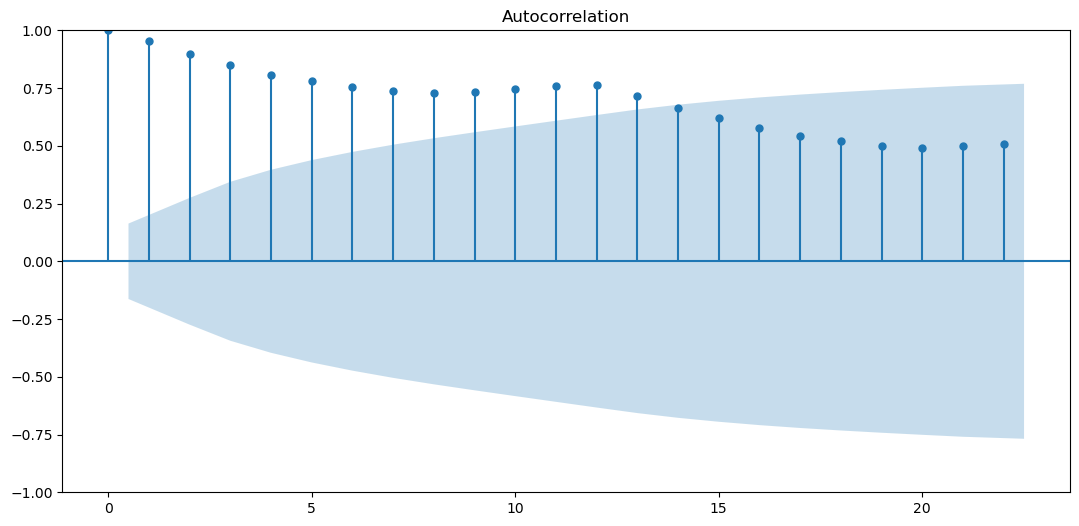

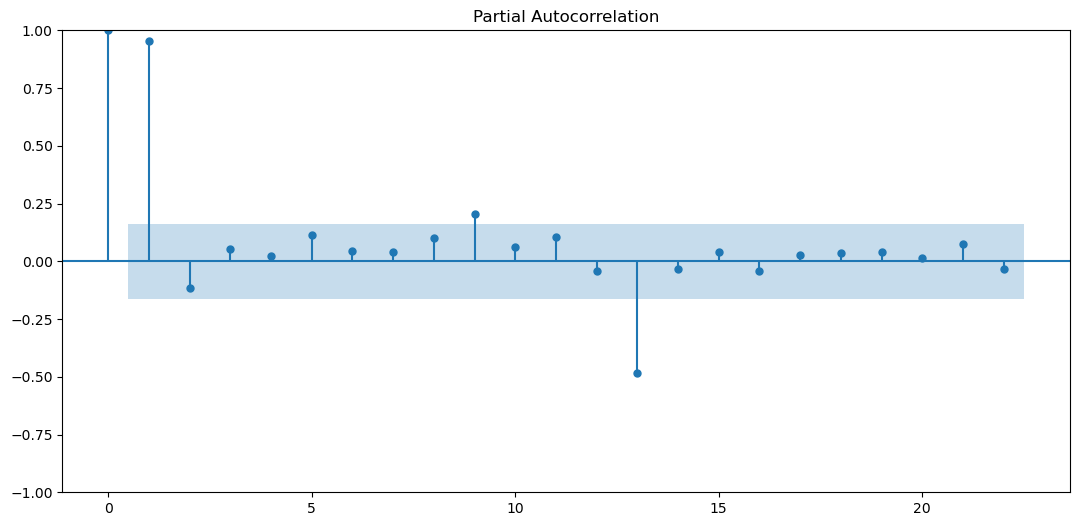

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고,     
PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약 결론 부분만 가져온 것입니다.
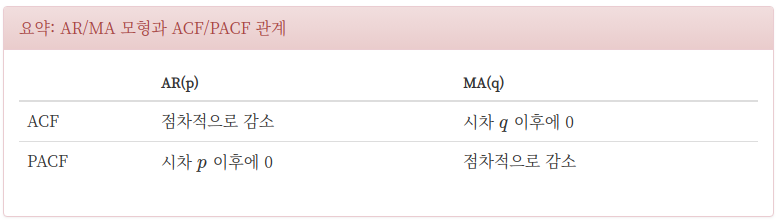

이 결론에 따라 보자면 PACF 그래프를 볼 때 p=1이 매우 적합한 것 같습니다.     
p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문입니다.    
PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.    
반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있습니다.     
q에 대해서는 적합한 값이 없어 보입니다. MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다.     
하지만 q를 바꿔 가면서 확인해 보는 것도 좋겠습니다.    
     
d를 구하기 위해서는 좀 다른 접근이 필요합니다. d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 합니다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


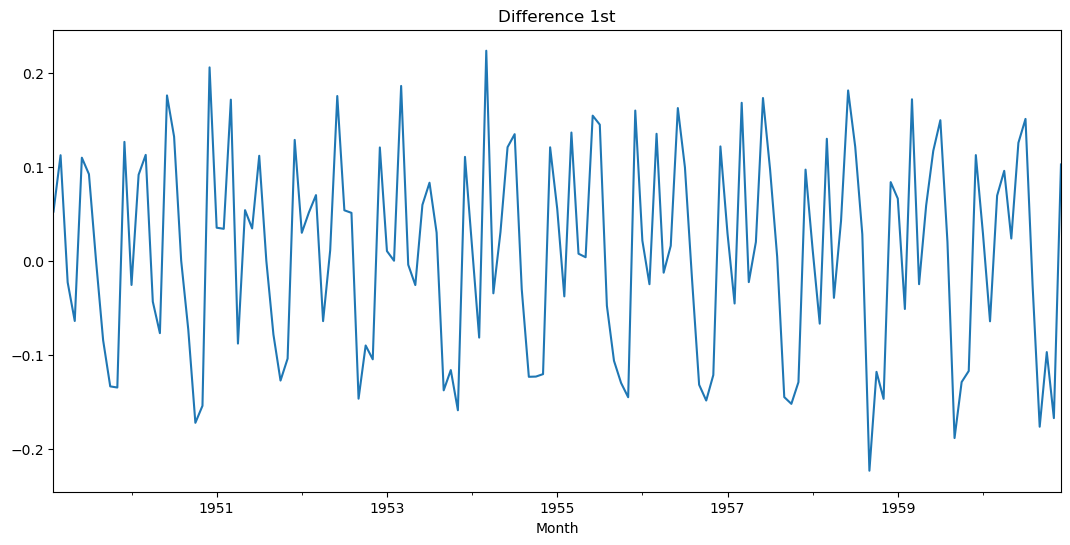

In [43]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


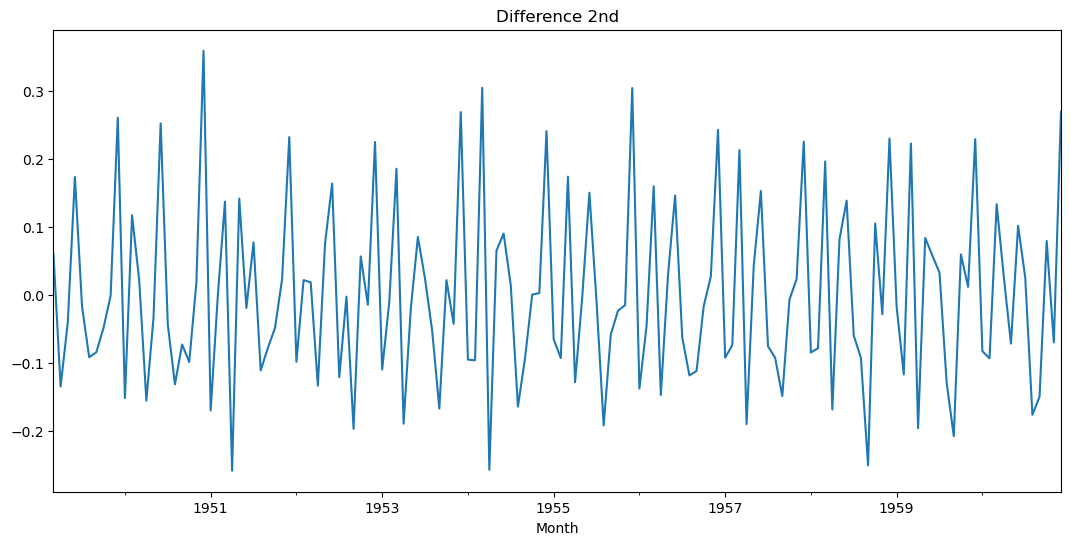

In [44]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였습니다.     
2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d=1로 먼저 시도해 볼 수 있을 것 같습니다.     
d 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.    

## 3. 학습 데이터 분리
아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다.     
분리 비율은 학습과 테스트에 9:1로 하겠습니다. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.

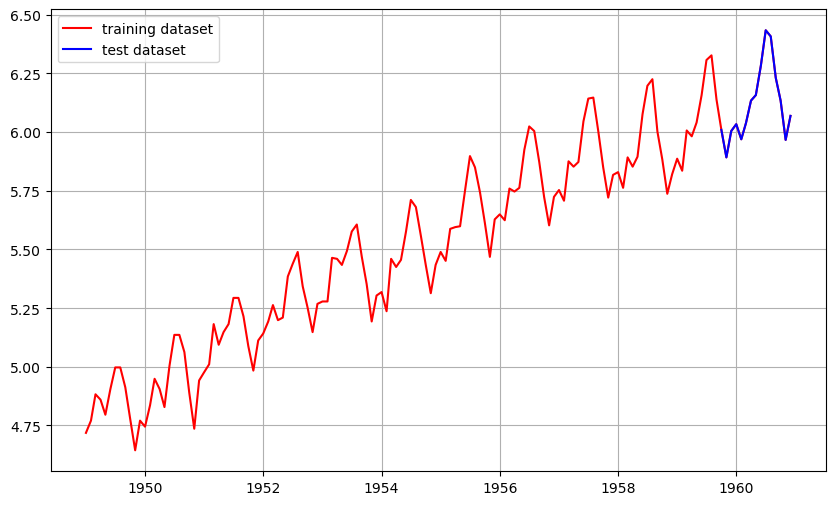

In [45]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [46]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


# 9-8. ARIMA 모델 훈련과 추론

ARIMA 모델을 훈련하는 것은 아래와 같이 간단합니다.

In [47]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.867
Date:                Tue, 27 May 2025   AIC                           -409.733
Time:                        14:30:58   BIC                           -366.953
Sample:                    01-01-1949   HQIC                          -392.351
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2599      0.082     -3.159      0.002      -0.421      -0.099
ar.L2         -0.0074      0.109     -0.068      0.946      -0.220       0.206
ar.L3          0.0066      0.046      0.143      0.8

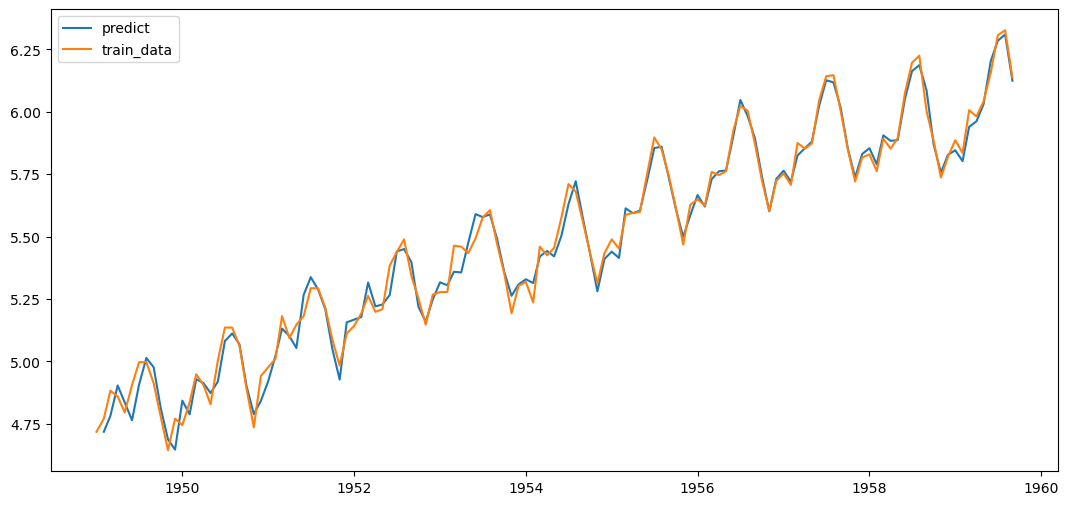

In [48]:
# ARIMA 모델이 훈련 결과를 시각적으로 확인해 보겠습니다.
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

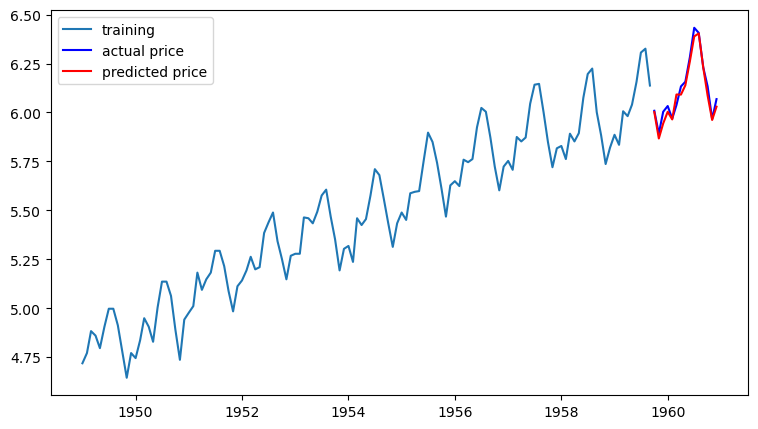

In [49]:
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있습니다.     
np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산합니다.    

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  221.60124192638366
MAE:  11.915678352223628
RMSE:  14.886276966601947
MAPE: 2.62%


결론 :    
최종적으로 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보입니다.     
썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지 모르겠습니다. p=14을 줄 경우 MAPE가 2% 정도로 내려갑니다.    
조금 더 다양한 테스트를 거쳐 최적화된 모델을 만들어 보시면 좋을것 같습니다.    

* 참고 MAPE : https://en.wikipedia.org/wiki/Mean_absolute_percentage_error